In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv(r"C:\Users\dwive\Desktop\HEALTH.csv")

In [3]:
df

,Overall Rank,City,Total Score,Health CareRank,Food Rank,Fitness Rank,Green Space Rank
0,1.0,"San Francisco, CA",73.99,29.0,1.0,4.0,1.0
1,2.0,"Seattle, WA",70.62,19.0,4.0,3.0,2.0
2,4.0,"Portland, OR",65.66,61.0,6.0,16.0,3.0
3,21.0,"Santa Clarita, CA",56.98,4.0,73.0,55.0,4.0
4,5.0,"Washington, DC",63.87,47.0,9.0,26.0,5.0
...,...,...,...,...,...,...,...
170,159.0,"Jackson, MS",33.78,99.0,164.0,149.0,171.0
171,167.0,"Augusta, GA",31.37,95.0,166.0,159.0,172.0
172,174.0,"Brownsville, TX",21.41,174.0,174.0,173.0,173.0
173,172.0,"Gulfport, MS",24.82,171.0,172.0,167.0,174.0


In [4]:
df.drop(df.tail(1).index,inplace=True)

In [5]:
df.tail()

,Overall Rank,City,Total Score,Health CareRank,Food Rank,Fitness Rank,Green Space Rank
169,164.0,"Mobile, AL",32.15,161.0,158.0,155.0,170.0
170,159.0,"Jackson, MS",33.78,99.0,164.0,149.0,171.0
171,167.0,"Augusta, GA",31.37,95.0,166.0,159.0,172.0
172,174.0,"Brownsville, TX",21.41,174.0,174.0,173.0,173.0
173,172.0,"Gulfport, MS",24.82,171.0,172.0,167.0,174.0


In [6]:
df.sort_values(['Total Score'], inplace=True)

In [7]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
longitude=[]
latitude = [] 

def findGeocode(city): 
      
    try: 
    
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
for i in (df["City"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
      
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
    
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 
df["Longitude"] = longitude 
df["Latitude"] = latitude 

In [8]:
df_new=df[["City", "Latitude", "Longitude"]]

In [9]:
import webbrowser
import folium
latitude = 37.0902405
longitude = -95.7128906
health_map = folium.Map(location=[latitude, longitude], zoom_start=5)

In [10]:
df_new['health_quartile'] = pd.cut(df['Overall Rank'], 4, labels=False)
colordict = {0: 'purple', 1: 'lightgreen', 2: 'orange', 3: 'red'}

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
for lat, lon, health_quartile, city in zip(df_new['Latitude'], df_new['Longitude'], df_new['health_quartile'], df_new['City']):
    folium.CircleMarker(
        [lat, lon],
        popup = ('City: ' + str(city).capitalize() + '<br>'
                 'Overall Rank: '  + '<br>'
                 ),
        color='b',
        key_on = health_quartile,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[health_quartile],
        fill=True,
        fill_opacity=0.7
        ).add_to(health_map)
health_map


In [12]:
df_healty=df.tail(5)

In [13]:
df_healty

,Overall Rank,City,Total Score,Health CareRank,Food Rank,Fitness Rank,Green Space Rank,Longitude,Latitude
4,5.0,"Washington, DC",63.87,47.0,9.0,26.0,5.0,-77.036571,38.894985
2,4.0,"Portland, OR",65.66,61.0,6.0,16.0,3.0,-122.674195,45.520247
7,3.0,"San Diego, CA",70.01,25.0,3.0,1.0,8.0,-117.162771,32.717421
1,2.0,"Seattle, WA",70.62,19.0,4.0,3.0,2.0,-122.330062,47.603832
0,1.0,"San Francisco, CA",73.99,29.0,1.0,4.0,1.0,-71.274327,46.844325


In [14]:
import matplotlib.pyplot as plt


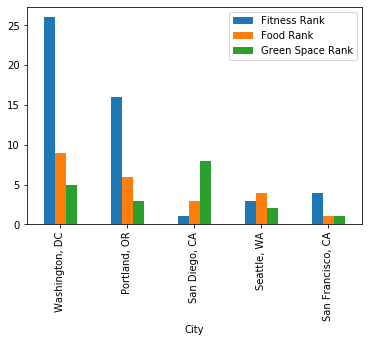

In [15]:
df_healty.plot(x="City", y=["Fitness Rank", "Food Rank", "Green Space Rank"], kind="bar")

In [16]:
 df_unhealty=df.head(5)

In [17]:
 df_unhealty

,Overall Rank,City,Total Score,Health CareRank,Food Rank,Fitness Rank,Green Space Rank,Longitude,Latitude
172,174.0,"Brownsville, TX",21.41,174.0,174.0,173.0,173.0,-97.489086,25.914026
155,173.0,"Laredo, TX",24.06,151.0,170.0,174.0,156.0,-99.495376,27.519984
173,172.0,"Gulfport, MS",24.82,171.0,172.0,167.0,174.0,-89.092816,30.367420
164,171.0,"Shreveport, LA",27.42,165.0,171.0,171.0,165.0,-93.765194,32.522183
159,170.0,"Memphis, TN",29.64,166.0,155.0,169.0,160.0,-90.051629,35.149022


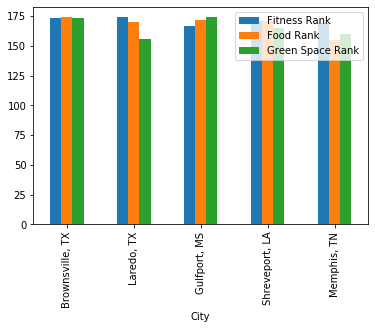

In [18]:
df_unhealty.plot(x="City", y=["Fitness Rank", "Food Rank", "Green Space Rank"], kind="bar")

In [19]:
df2=pd.read_csv(r"C:\Users\dwive\Desktop\texas.csv")

In [20]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (df2["Neighbourhood"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two seperate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [21]:
df2["Longitude"] = longitude 
df2["Latitude"] = latitude 

In [22]:
neighborhoods= df2[["Neighbourhood", "Latitude", "Longitude"]]

neighborhoods.head()

,Neighbourhood,Latitude,Longitude
0,802 and Homestead Meadows,31.841775,-106.175813
1,Acacia Lake,7.192088,125.602499
2,Avenida del Sol,20.615688,-100.442669
3,Boca Chica Blvd,25.962119,-97.285876
4,Briarwyck,35.612011,-97.458846


In [23]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install geopy
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [24]:
address = 'Brownsville Texas'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brownsville  are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brownsville  are 25.9140256, -97.4890856.


In [25]:
CLIENT_ID = 'ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40' # your Foursquare ID
CLIENT_SECRET = 'N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40
CLIENT_SECRET:N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP


In [26]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 802 and Homestead Meadows are 31.841775, -106.175813.


In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&v=20180605&ll=31.841775,-106.175813&radius=2000&limit=100'

In [28]:
search_query = 'gym'
radius = 5000
print(search_query + ' .... OK!')

gym .... OK!


In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&ll=25.9140256,-97.4890856&v=20180605&query=gym&radius=5000&limit=100'

In [30]:
results1 = requests.get(url).json()

results1

{'meta': {'code': 200, 'requestId': '5efb7bd82f5bc4555bc750f6'},
 'response': {'venues': [{'id': '4cafaff3562d224b002c1088',
    'name': 'UTRGV/GYM',
    'location': {'address': '1-99 Gorgas Dr',
     'lat': 25.898006893361075,
     'lng': -97.49106465482734,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.898006893361075,
       'lng': -97.49106465482734}],
     'distance': 1794,
     'postalCode': '78520',
     'cc': 'US',
     'city': 'Brownsville',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['1-99 Gorgas Dr',
      'Brownsville, TX 78520',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1b2941735',
      'name': 'College Gym',
      'pluralName': 'College Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593539899',
    'hasPerk': False},
   {'id': '4cd1afb348b837041761fade',
    

In [31]:
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues)

dataframe1

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4cafaff3562d224b002c1088,UTRGV/GYM,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",v-1593539899,False,1-99 Gorgas Dr,25.898007,-97.491065,"[{'label': 'display', 'lat': 25.89800689336107...",1794,78520,US,Brownsville,TX,United States,"[1-99 Gorgas Dr, Brownsville, TX 78520, United...",NaN
1,4cd1afb348b837041761fade,Gym Annex,[],v-1593539899,False,80 Fort Brown St,25.902690,-97.488530,"[{'label': 'display', 'lat': 25.90269, 'lng': ...",1263,78520,US,Brownsville,TX,United States,"[80 Fort Brown St, Brownsville, TX 78520, Unit...",NaN
2,4cd6f57a94848cfa0f09f0b1,Brown's Gym [Fitness Club],"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593539899,False,Southmost,25.895828,-97.456799,"[{'label': 'display', 'lat': 25.89582790209633...",3815,78521,US,Brownsville,TX,United States,"[Southmost, Brownsville, TX 78521, United States]",NaN
3,4eb08e4c9adf1abeff6e4934,UTB/TSC Manuel Garza Gymnasium,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",v-1593539899,False,NaN,25.897905,-97.490948,"[{'label': 'display', 'lat': 25.89790544807164...",1804,NaN,US,Brownsville,TX,United States,"[Brownsville, TX, United States]",NaN
4,4bffd8d0ca1920a1e05bed81,Gold's Gym,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1593539899,False,800 Sunrise Blvd.,25.961424,-97.506416,"[{'label': 'display', 'lat': 25.96142413164829...",5554,78526,US,Brownsville,TX,United States,"[800 Sunrise Blvd. (Highway 77), Brownsville, ...",Highway 77
5,4e388bc6fa763bfcc3659e37,Gold's Gym Express,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1593539899,False,NaN,25.922045,-97.474584,"[{'label': 'display', 'lat': 25.92204483607730...",1704,NaN,US,NaN,Texas,United States,"[Texas, United States]",NaN
6,4d6d9a3f134ea143953c831a,Body Workz Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593539899,False,3525 International Blvd,25.914719,-97.472778,"[{'label': 'display', 'lat': 25.91471862792968...",1634,78521,US,Brownsville,TX,United States,"[3525 International Blvd, Brownsville, TX 7852...",NaN
7,528adcd611d2a54b7e92ef5f,Sparta Performance Gym,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1593539899,False,Lauro Villar,25.867239,-97.483788,"[{'label': 'display', 'lat': 25.86723945745468...",5235,NaN,MX,NaN,NaN,México,"[Lauro Villar, México]",NaN
8,4f32c71119836c91c7f97f62,Tito's Gym,"[{'id': '4d4b7105d754a06376d81259', 'name': 'N...",v-1593539899,False,311 Kings Hwy,25.923466,-97.472015,"[{'label': 'display', 'lat': 25.92346572875976...",2006,78521,US,Brownsville,TX,United States,"[311 Kings Hwy, Brownsville, TX 78521, United ...",NaN
9,4f7b8b35e4b0e215cbd8a0ce,Ocejo Gym Kickboxing,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1593539899,False,NaN,25.934141,-97.478997,"[{'label': 'display', 'lat': 25.934141, 'lng':...",2456,78521,US,Brownsville,TX,United States,"[Brownsville, TX 78521, United States]",NaN


In [32]:
search_query = "Vegetarian Friendly Restaurants"
radius = 5000
print(search_query + ' .... OK!')

Vegetarian Friendly Restaurants .... OK!


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&ll=25.9140256,-97.4890856&v=20180605&query=Vegetarian Friendly Restaurants&radius=5000&limit=100'

In [34]:
results2 = requests.get(url).json()

results2

{'meta': {'code': 200, 'requestId': '5efb7cea1ec6724d866faefa'},
 'response': {'venues': []}}

In [35]:

venues = results2['response']['venues']

# tranform venues into a dataframe
dataframe2 = json_normalize(venues)

dataframe2.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


""


In [36]:
search_query = "spa"
radius = 5000
print(search_query + ' .... OK!')

spa .... OK!


In [37]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&ll=25.9140256,-97.4890856&v=20180605&query=spa&radius=5000&limit=100'

In [38]:
results3 = requests.get(url).json()

results3

{'meta': {'code': 200, 'requestId': '5efb7d213d724a7b3d265a12'},
 'response': {'venues': [{'id': '4daca7af4b22ee6dec09c8b5',
    'name': 'Revitalize MD Spa & Anti Aging',
    'location': {'address': '1200 Central Blvd A3 A4',
     'lat': 25.922327041625977,
     'lng': -97.5114517211914,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.922327041625977,
       'lng': -97.5114517211914}],
     'distance': 2422,
     'postalCode': '78520',
     'cc': 'US',
     'city': 'Brownsville',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['1200 Central Blvd A3 A4',
      'Brownsville, TX 78520',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593539900',
    'hasPerk':

In [39]:
venues = results3['response']['venues']

# tranform venues into a dataframe
dataframe3 = json_normalize(venues)

dataframe3.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet
0,4daca7af4b22ee6dec09c8b5,Revitalize MD Spa & Anti Aging,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1593539900,False,1200 Central Blvd A3 A4,25.922327,-97.511452,"[{'label': 'display', 'lat': 25.92232704162597...",2422,78520,US,Brownsville,TX,United States,"[1200 Central Blvd A3 A4, Brownsville, TX 7852...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4f3ed826e4b0c44ac44ab2a9,California Kutz & Spa,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1593539900,False,2404 E 13th St,25.911213,-97.483776,"[{'label': 'display', 'lat': 25.911213, 'lng':...",616,78521,US,Brownsville,TX,United States,"[2404 E 13th St, Brownsville, TX 78521, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4d7a76707654224be45298ed,The Carriage House Day Spa,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1593539900,False,319 E Elizabeth St,25.906978,-97.503919,"[{'label': 'display', 'lat': 25.906978, 'lng':...",1679,78520,US,Brownsville,TX,United States,"[319 E Elizabeth St, Brownsville, TX 78520, Un...",39036951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53b59d2e498ef6049fe291c2,BioCapelli Spa & Salon,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1593539900,False,620 Paredes Line Rd Ste E,25.931562,-97.488159,"[{'label': 'display', 'lat': 25.93156242370605...",1954,78521,US,Brownsville,TX,United States,"[620 Paredes Line Rd Ste E, Brownsville, TX 78...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4bcc947cfb84c9b6f6a0203e,Spankys Burgers,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1593539900,False,Palm Blvd.,25.914897,-97.500606,"[{'label': 'display', 'lat': 25.91489711099426...",1157,78521,US,Brownsville,TX,United States,"[Palm Blvd., Brownsville, TX 78521, United Sta...",NaN,1687281,https://www.grubhub.com/restaurant/spankys-bur...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN


In [40]:
search_query = "parks"
radius = 5000
print(search_query + ' .... OK!')

parks .... OK!


In [41]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&ll=25.9140256,-97.4890856&v=20180605&query=parks&radius=5000&limit=100'

In [42]:
results4 = requests.get(url).json()

results4

{'meta': {'code': 200, 'requestId': '5efb7d2ef1f0896dbd4551c2'},
 'response': {'venues': [{'id': '4e0f1d6b14956c628500b701',
    'name': 'Parks & Recreation Building',
    'location': {'lat': 25.909312,
     'lng': -97.494928,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.909312,
       'lng': -97.494928}],
     'distance': 785,
     'cc': 'US',
     'city': 'Brownsville',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['Brownsville, TX', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e1941735',
      'name': 'Basketball Court',
      'pluralName': 'Basketball Courts',
      'shortName': 'Basketball Court',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/basketballcourt_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593539900',
    'hasPerk': False},
   {'id': '4e17b676183880768f39ec06',
    'name': 'Parks & Recreation Center',
    'location': {'lat': 25.9224195622

In [43]:
venues = results4['response']['venues']

# tranform venues into a dataframe
dataframe4 = json_normalize(venues)

dataframe4.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.address
0,4e0f1d6b14956c628500b701,Parks & Recreation Building,"[{'id': '4bf58dd8d48988d1e1941735', 'name': 'B...",v-1593539900,False,25.909312,-97.494928,"[{'label': 'display', 'lat': 25.909312, 'lng':...",785,US,Brownsville,TX,United States,"[Brownsville, TX, United States]",NaN,NaN
1,4e17b676183880768f39ec06,Parks & Recreation Center,"[{'id': '4bf58dd8d48988d162941735', 'name': 'O...",v-1593539900,False,25.922420,-97.491636,"[{'label': 'display', 'lat': 25.92241956228779...",968,US,Brownsville,TX,United States,"[Brownsville, TX 78520, United States]",78520,NaN
2,4d9f246d640b54811a9ad92d,Lincoln Park School,[],v-1593539900,False,25.901464,-97.478115,"[{'label': 'display', 'lat': 25.90146399105517...",1778,US,NaN,Texas,United States,"[7 orange street, Texas, United States]",NaN,7 orange street
3,52f7e2ec498ee210116b3863,Portway Acres Park Solar Project,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593539900,False,25.930839,-97.443654,"[{'label': 'display', 'lat': 25.930839, 'lng':...",4918,US,Brownsville,TX,United States,"[Brownsville, TX, United States]",NaN,NaN


In [44]:
dataframe4["categories"] .count() 


4

In [45]:
dataframe3["categories"] .count() 

34

In [46]:
dataframe1["categories"] .count() 

25

In [47]:
dict = {'Category':["VeganResturant", "Park", "Gym", "Spas"], 
        'Counts':[0, 4, 25, 34]} 
df_cat = pd.DataFrame(dict) 

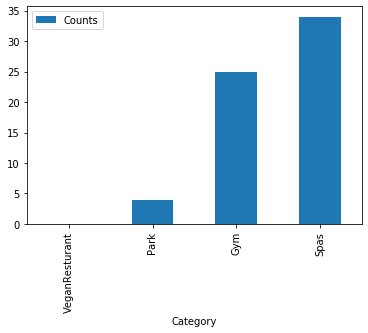

In [48]:
ax = df_cat.plot.bar(x='Category', y='Counts')

In [49]:
df_ca=pd.read_csv(r"C:\Users\dwive\Desktop\City CA.csv")


In [50]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (df_ca["Neighborhood"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two seperate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [51]:
df_ca["Longitude"] = longitude 
df_ca["Latitude"] = latitude 

In [52]:
neighborhood= df_ca[["Neighborhood", "Latitude", "Longitude"]]

neighborhood.head()

,Neighborhood,Latitude,Longitude
0,Alamo Square,37.776360,-122.434689
1,Anza Vista,37.780836,-122.443149
2,Ashbury Heights,33.767144,-84.274288
3,Balboa Park,32.731357,-117.146527
4,Balboa Terrace,28.910369,-81.199660


In [53]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install geopy
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


In [54]:
address = 'San Francisco, California '
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco  are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco  are 37.7790262, -122.4199061.


In [55]:
neighborhood_latitude = neighborhood.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhood.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhood.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and Longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and Longitude values of Alamo Square are 37.77635985, -122.43468852023724.


In [56]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZTCGLDTIHMPBXXPGUAKEAZXNN0NKLEUKYRLBWIM43TK1AN40&client_secret=N2ZDUWYAOQDSG2Z1LLNXA4T30XY1UFF2RT0RFYKXI0YDWBPP&v=20180605&ll=37.77635985,-122.43468852023724&radius=2000&limit=100'

In [57]:
search_query = 'gym'
radius = 5000
print(search_query + ' .... OK!')

gym .... OK!


In [58]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [59]:
results_ca1 = requests.get(url).json()

results_ca1

{'meta': {'code': 200, 'requestId': '5efb7c2ee0d74740ce52161f'},
 'response': {'venues': [{'id': '4fff1bd7e4b04497d939cdb2',
    'name': 'Gym',
    'location': {'address': '639 Geary St',
     'crossStreet': 'btwn Jones & Leavenworth St',
     'lat': 37.7865926260266,
     'lng': -122.413751093791,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.7865926260266,
       'lng': -122.413751093791}],
     'distance': 1001,
     'postalCode': '94102',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['639 Geary St (btwn Jones & Leavenworth St)',
      'San Francisco, CA 94102',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d176941735',
      'name': 'Gym',
      'pluralName': 'Gyms',
      'shortName': 'Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593540028',
    'hasPerk

In [60]:
venues = results_ca1['response']['venues']

# tranform venues into a dataframe
dataframe_ca1 = json_normalize(venues)

dataframe_ca1.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4fff1bd7e4b04497d939cdb2,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593540028,False,639 Geary St,btwn Jones & Leavenworth St,37.786593,-122.413751,"[{'label': 'display', 'lat': 37.7865926260266,...",1001,94102,US,San Francisco,CA,United States,"[639 Geary St (btwn Jones & Leavenworth St), S...",NaN,NaN
1,4c8c15535e38b1f74b462ef9,Mission Dolores Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593540028,False,3371 16th St,Church,37.764089,-122.428353,"[{'label': 'display', 'lat': 37.76408898616429...",1821,94114,US,San Francisco,CA,United States,"[3371 16th St (Church), San Francisco, CA 9411...",NaN,NaN
2,5b775c2e3e6741002cc6b20a,150 Van Ness Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593540028,False,150 Van Ness Ave,Hayes Street,37.777123,-122.418768,"[{'label': 'display', 'lat': 37.777123, 'lng':...",234,94102,US,San Francisco,CA,United States,"[150 Van Ness Ave (Hayes Street), San Francisc...",NaN,NaN
3,4fa8b7d7e4b00b5cf0b06491,Gym & Fitness Center,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",v-1593540028,False,1489 Webster St,at Geary Blvd,37.783894,-122.432007,"[{'label': 'entrance', 'lat': 37.784215, 'lng'...",1194,94115,US,San Francisco,CA,United States,"[1489 Webster St (at Geary Blvd), San Francisc...",NaN,NaN
4,4ba55727f964a520a8fc38e3,Clift Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1593540028,False,Clift Hotel,495 Geary St,37.786885,-122.411070,"[{'label': 'display', 'lat': 37.78688507548134...",1170,94102,US,San Francisco,CA,United States,"[Clift Hotel (495 Geary St), San Francisco, CA...",NaN,NaN


In [61]:
search_query ='vegan Restaurants'
radius = 5000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

vegan Restaurants .... OK!


In [62]:
results_ca2 = requests.get(url).json()

results_ca2
venues = results_ca2['response']['venues']

# tranform venues into a dataframe
dataframe_ca2 = json_normalize(venues)

dataframe_ca2.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,location.neighborhood,venuePage.id
0,5cc4ea0cc66666002ca07cc0,Vegan Picnic Polk St,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1593540028,False,1323 Polk St,37.788959,-122.420448,"[{'label': 'display', 'lat': 37.788959, 'lng':...",1106,94109,US,San Francisco,CA,United States,"[1323 Polk St, San Francisco, CA 94109, United...",1270341,https://www.grubhub.com/restaurant/vegan-picni...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN
1,4dffab0ed4c00c69c14d2f1e,Vegan Plaza,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1593540028,False,995 Market St,37.781963,-122.409698,"[{'label': 'display', 'lat': 37.78196334838867...",955,94103,US,San Francisco,CA,United States,"[995 Market St (6th street), San Francisco, CA...",2055388,https://www.grubhub.com/restaurant/vegan-med-c...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,6th street,NaN,NaN
2,5c13456a8a4cf5002c3e151c,Vegan-N-Kebob,"[{'id': '52e81612bcbc57f1066b79f8', 'name': 'P...",v-1593540028,False,1109 Fillmore St,37.779830,-122.432130,"[{'label': 'display', 'lat': 37.77983, 'lng': ...",1079,94115,US,San Francisco,CA,United States,"[1109 Fillmore St (Golden Gate Ave), San Franc...",NaN,NaN,NaN,NaN,NaN,NaN,Golden Gate Ave,NaN,NaN
3,547a3a09498edded45384099,Golden Era Vegan,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1593540028,False,395 Golden Gate Ave,37.781495,-122.416822,"[{'label': 'display', 'lat': 37.78149473910515...",386,94102,US,San Francisco,CA,United States,"[395 Golden Gate Ave, San Francisco, CA 94102,...",2212124,https://www.grubhub.com/restaurant/golden-era-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN
4,58af46d1951e7d0a6394102b,Vegan Picnic,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1593540028,False,1977 Union St,37.797490,-122.431748,"[{'label': 'display', 'lat': 37.79749028773226...",2304,94123,US,San Francisco,CA,United States,"[1977 Union St (Buchanan), San Francisco, CA 9...",NaN,NaN,NaN,NaN,NaN,NaN,Buchanan,Union Street,NaN


In [63]:
search_query = 'park'
radius = 5000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

park .... OK!


In [64]:
results_ca3 = requests.get(url).json()

results_ca3
venues = results_ca3['response']['venues']

# tranform venues into a dataframe
dataframe_ca3 = json_normalize(venues)

dataframe_ca3.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4ab595e1f964a520877520e3,Mission Dolores Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593540028,False,Dolores & Church St,btwn 18th & 20th St,37.759990,-122.427118,"[{'label': 'display', 'lat': 37.75998998481965...",2212,94114,US,San Francisco,CA,United States,"[Dolores & Church St (btwn 18th & 20th St), Sa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4ab3edf8f964a520286f20e3,Lafayette Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593540028,False,2000 Sacramento St,at Gough St,37.791247,-122.428081,"[{'label': 'display', 'lat': 37.79124659495137...",1538,94109,US,San Francisco,CA,United States,"[2000 Sacramento St (at Gough St), San Francis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ac56279f964a520cfb120e3,Jefferson Square Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593540028,False,Turk St,btwn Gough & Laguna St,37.781781,-122.425632,"[{'label': 'display', 'lat': 37.78178135880566...",589,94109,US,San Francisco,CA,United States,"[Turk St (btwn Gough & Laguna St), San Francis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4460d33cf964a52009331fe3,Duboce Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593540028,False,Duboce Ave,btwn Scott & Steiner,37.769458,-122.433013,"[{'label': 'display', 'lat': 37.76945795215864...",1569,94117,US,San Francisco,CA,United States,"[Duboce Ave (btwn Scott & Steiner), San Franci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4aa80a86f964a520eb4e20e3,Alta Plaza Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",v-1593540028,False,2700 Clay St.,btwn Scott & Steiner St.,37.791151,-122.437713,"[{'label': 'display', 'lat': 37.79115065006549...",2067,94115,US,San Francisco,CA,United States,"[2700 Clay St. (btwn Scott & Steiner St.), San...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
search_query = 'spa'
radius = 5000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

spa .... OK!


In [66]:
results_ca4 = requests.get(url).json()

results_ca4
venues = results_ca4['response']['venues']

# tranform venues into a dataframe
dataframe_ca4 = json_normalize(venues)

dataframe_ca4.head()

C:\Users\dwive\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4fed0ef4e4b053eae00897f2,Qua Spa,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1593540029,False,1162 Mission St,btwn 7th St & Julia St,37.778319,-122.412190,"[{'label': 'display', 'lat': 37.77831900181201...",683,94103,US,San Francisco,CA,United States,"[1162 Mission St (btwn 7th St & Julia St), San...",NaN
1,585c8202ca1070180ddb525c,Pearl Spa and Sauna,"[{'id': '52e81612bcbc57f1066b7a27', 'name': 'B...",v-1593540029,False,1656 Post St,NaN,37.785642,-122.429130,"[{'label': 'display', 'lat': 37.78564198712985...",1095,94115,US,San Francisco,CA,United States,"[1656 Post St, San Francisco, CA 94115, United...",NaN
2,4a77af9df964a520fee41fe3,Imperial Spa,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1593540029,False,1875 Geary Blvd,btw Filmore and Steiner,37.784041,-122.434251,"[{'label': 'display', 'lat': 37.78404135309807...",1380,94115,US,San Francisco,CA,United States,"[1875 Geary Blvd (btw Filmore and Steiner), Sa...",NaN
3,4b96b56ef964a52068df34e3,M Spa - Castro,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1593540029,False,2187 Market St,Sanchez,37.765992,-122.430730,"[{'label': 'display', 'lat': 37.76599241746241...",1735,94114,US,San Francisco,CA,United States,"[2187 Market St (Sanchez), San Francisco, CA 9...",52310589
4,5a9506254ac28a7f9356fe6e,B. Slim Spa,"[{'id': '590a0744340a5803fd8508c3', 'name': 'W...",v-1593540029,False,1600 Geary Blvd,NaN,37.784942,-122.430338,"[{'label': 'display', 'lat': 37.7849419, 'lng'...",1129,94115,US,San Francisco,CA,United States,"[1600 Geary Blvd, San Francisco, CA 94115, Uni...",NaN


In [67]:
dataframe_ca1["categories"] .count() 

50

In [68]:
dataframe_ca2["categories"] .count()

34

In [69]:
dataframe_ca3["categories"] .count()

50

In [70]:
dataframe_ca4["categories"] .count()

50

In [71]:
dict = {'Category':["Gym", "VeganResturant", "Park",  "Spas"], 
        'Counts':[50, 50, 50, 50]} 
df_can = pd.DataFrame(dict) 

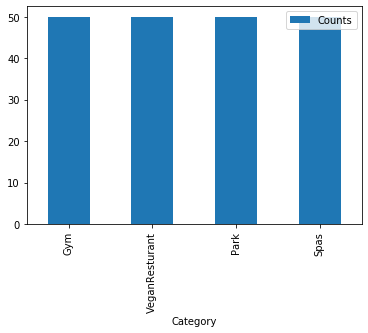

In [72]:
ax = df_can.plot.bar(x='Category', y='Counts')

<h2>FINISH